# Taylor Series

The study of **Taylor series** is largely about taking non-polynomial functions and finding **polynomials** that approximate them near some point. Polynomials tend to be much easier to deal with than other functions, as they are easier to compute, easier to take derivatives and easier to integrate.

The goal is to construct a quadratic approximation at some point. It should look like this:

$$ P (x) = c_0 + c_1x + c_2x^2 + \cdots $$ 

where $ c_0, c_1, c_2, c_3$, etc. are constants that can be changed.
The first part of this polynomial gets a match of the output of te eactual function at some point. The second part, the first derivative, gets the same slope as the original function. The third part, the second derivative, gets a curve at the sam rate.  With each added part, the approximation becomes more precise.



_**Note**: The text above quotes [3Blue1Brown](https://www.youtube.com/watch?v=3d6DsjIBzJ4)._

### Maclaurin Series

A **Maclaurin** series is a Taylor series centered at zero. The Maclauran expansions of sine and cosine around zero are two of the five most important Taylor/Maclaurin expansion formulas, which are usually memorized and not derived, as they proved to be very useful.

The Taylor/Maclaurin series expansion for the sine function around \( x = 0 \) is presented as:
$$ \sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} $$

This can be written out explicitly as:
$$ \sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \frac{x^9}{9!} - \cdots $$

The expansion for the cosine function around \( x = 0 \) is as follows:
$$ \cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!} x^{2n} $$

This can be written out explicitly as:
$$ 
\cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \frac{x^8}{8!} -\cdots $$

For more details on that these two lessons by CalcWorkshop are worth it: [1](https://calcworkshop.com/sequences-series/maclaurin-and-taylor-series/) & [2](https://calcworkshop.com/sequences-series/taylor-series/)

The code below visualizes how the Taylor/Mauclarian series approximations of the sine and cosine functions become more accurate as more terms are added. The actual functions are also plotted for comparison. The implementation is done using SymPy.

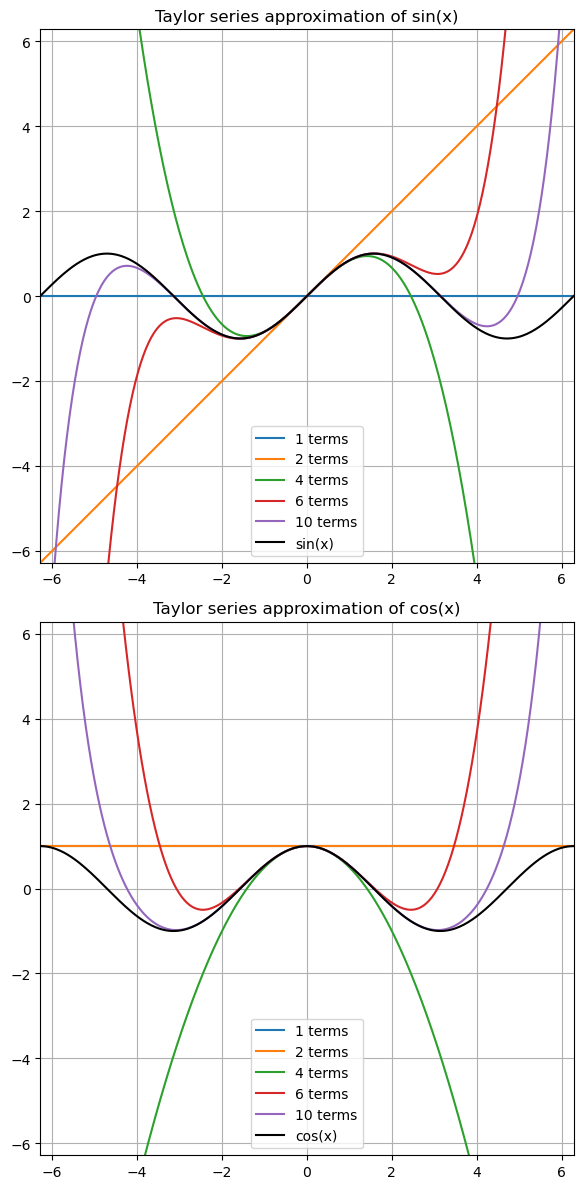

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def taylor_sine_sympy(x_value, n_terms=10):
    x_sym = sp.symbols('x') # using the symbols function  to create a symbolic variable named x, a needed step in symbolic mathematics
    sine_series = sp.series(sp.sin(x_sym), x_sym, 0, n_terms).removeO() # computes the Taylor series and removes the big-O notation term
    sine_approx = sine_series.subs(x_sym, x_value) # substitutes the symbolic variable x with a specific numerical value
    return sine_approx.evalf() # evaluates the resulting expression numerically.

def taylor_cosine_sympy(x_value, n_terms=10):
    x_sym = sp.symbols('x')
    cosine_series = sp.series(sp.cos(x_sym), x_sym, 0, n_terms).removeO()
    cosine_approx = cosine_series.subs(x_sym, x_value)
    return cosine_approx.evalf()

# Define the range of x values (from -2π to 2π)
x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 400)
x_vals_sympy = [sp.Float(x) for x in x_vals] # converts the numpy array of x_vals to sympy float objects for symbolic calculations

# Number of terms to test
terms_list = [1, 2, 4, 6, 10]

# Initialize plots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot sine approximations
for n_terms in terms_list:
    sine_approx_vals = [taylor_sine_sympy(x, n_terms) for x in x_vals_sympy]
    ax[0].plot(x_vals, sine_approx_vals, label=f'{n_terms} terms')

# Plot the actual sine function
ax[0].plot(x_vals, np.sin(x_vals), 'k-', label='sin(x)')
ax[0].set_title('Taylor series approximation of sin(x)')
ax[0].legend()
ax[0].grid(True)
ax[0].set_aspect('equal')  
ax[0].set_xlim([-2 * np.pi, 2 * np.pi])
ax[0].set_ylim([-2 * np.pi, 2 * np.pi])  

# Plot cosine approximations
for n_terms in terms_list:
    cosine_approx_vals = [taylor_cosine_sympy(x, n_terms) for x in x_vals_sympy]
    ax[1].plot(x_vals, cosine_approx_vals, label=f'{n_terms} terms')

# Plot the actual cosine function
ax[1].plot(x_vals, np.cos(x_vals), 'k-', label='cos(x)')
ax[1].set_title('Taylor series approximation of cos(x)')
ax[1].legend()
ax[1].grid(True)
ax[1].set_aspect('equal')  
ax[1].set_xlim([-2 * np.pi, 2 * np.pi])
ax[1].set_ylim([-2 * np.pi, 2 * np.pi]) 

# Show the plots
plt.tight_layout()
plt.show()

The following observations can be made about the Taylor series:
* At the center (in the case above the center is 0, the polynomial matches the curve exactly;
* Accuracy is lost the further away from the center;
* Accuracy is gained by adding more terms (derivatives).

**Note:** For the cosine approximation, the blue line overlaps with the orange line, as both are evaluated at 1. This is because the Taylor series of cos(x) expanded at zero begins with 
1 and for one term, the evaluation is 1. For two terms it is as follows:

$$ cos(0) = 1 - \frac{0^2}{2!} = 1 - 0 = 1 $$